# SUPPA v1.1 vs. v1.2 benchmarking

Compares of Suppa corelation with Q-PCR data from Shen et al. 2012.



In [1]:
# Importing the data

from matplotlib import pyplot
from calc_funcs import *
from scipy.stats.stats import pearsonr
import os
from scipy.stats import ranksums
import numpy as np

%matplotlib inline

# Dimension setup
pyplot.rcParams['figure.figsize'] = (15.0, 8.0)


## Refseq annotation test

ESRP1 SAMPLE:
SUPA v1.1: PSI from sailfish numbers:
	Points covered: 59 (35.9756 %; removed 1 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.1: PSI from sailfish numbers:
	Points covered: 59 (35.9756 %; removed 1 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)


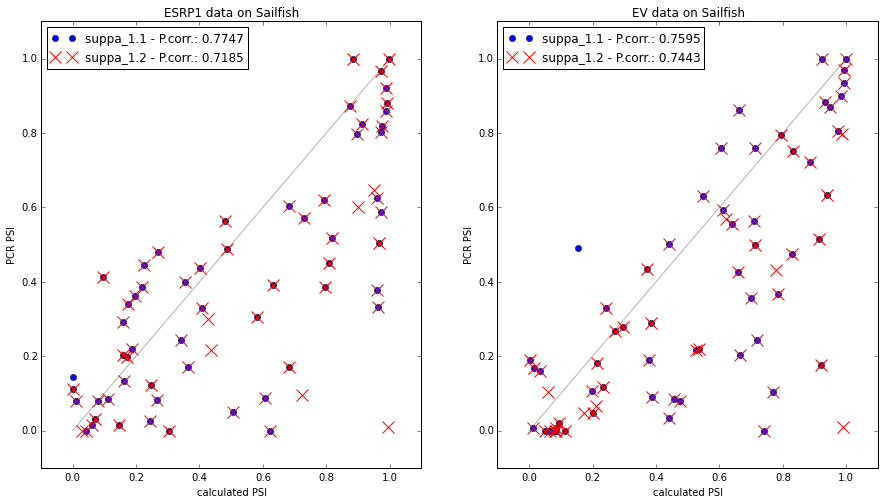

In [2]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()

print('ESRP1 SAMPLE:')
print('SUPA v1.1: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa1_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA v1.2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/refseq_sailfish_suppa2_esrp1.txt.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.1: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa1_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA v1.2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/refseq_sailfish_suppa2_ev.txt.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.1', sam2_lab='suppa_1.2')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.1', sam2_lab='suppa_1.2')



EV: Suppa_1.2 recovers more events. Slightly lower correlation (duo to newly recovered outliers). <br/>
ESRP1: Data is realy sparse, bad correlation in both cases.

In [3]:
# rank test functions and plot deffinitions

def get_points_n_diff(in_points):
    """
    Given a pairs of points returns absolute difference 
    and tuple of plot points
    """
    abs_difs = [abs(a - b) for a, b in in_points]
    cum_difs = np.cumsum(sorted(abs_difs))
    rel_dif = cum_difs / np.max(cum_difs)
    y_points = [x / len(rel_dif) for x in range(1, len(rel_dif) + 1)]
    return abs_difs, (rel_dif, y_points)

def plot_ranksumtest(subplot, group1,
                     group2, name1, name2, mtitle=''):
    """
    Plots rank sum test results.
    """
    axes = my_figure.add_subplot(121)
    
    subplot.step(*group1[1], label=name1);
    subplot.step(*group2[1], label=name2);
    subplot.legend(loc='best');
    subplot.set_title(mtitle + '\nWilcoxon rank-sum p-value is: {:.4f}'.format(ranksums(group1[0],group2[0])[1]))


def fetch_meandev_n_auc(points, diff):
    """
    Returns Average deviation and Area under curve
    """
    area = 0
    avr_dev = np.mean(points)
    x_ax = [0] + list(diff[0])
    y_ax = [0] + list(diff[1])
    
    for i in range(1, len(x_ax)):
        area += (x_ax[i] - x_ax[i-1]) * y_ax[i]
    return area, avr_dev

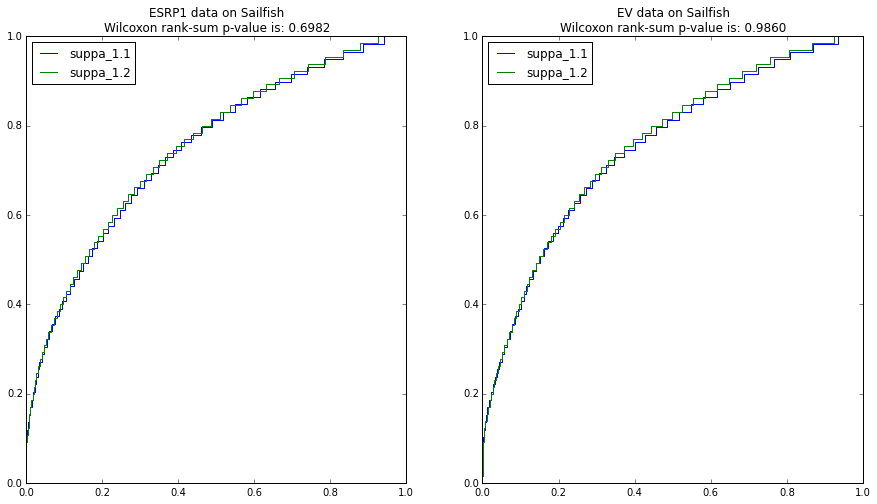


Graph1, sample1:
	Average Error is: 0.1853
	Area under curve is: 0.7470
Graph1, sample2:
	Average Error is: 0.2059
	Area under curve is: 0.7530
Graph2, sample1:
	Average Error is: 0.1900
	Area under curve is: 0.7524
Graph2, sample2:
	Average Error is: 0.1962
	Area under curve is: 0.7589


In [4]:

my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'suppa_1.1', 'suppa_1.2', mtitle='ESRP1 data on Sailfish')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'suppa_1.1', 'suppa_1.2', mtitle='EV data on Sailfish')
pyplot.show()
print()

ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

## Ensembl annotation test

ESRP1 SAMPLE:
SUPA v1.1: PSI from sailfish numbers:
	Points covered: 89 (54.2683 %; removed 6 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 107 (65.2439 %; removed 9 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.1: PSI from sailfish numbers:
	Points covered: 89 (54.2683 %; removed 6 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 108 (65.8537 %; removed 9 point(s) duo to "duplicated" event)


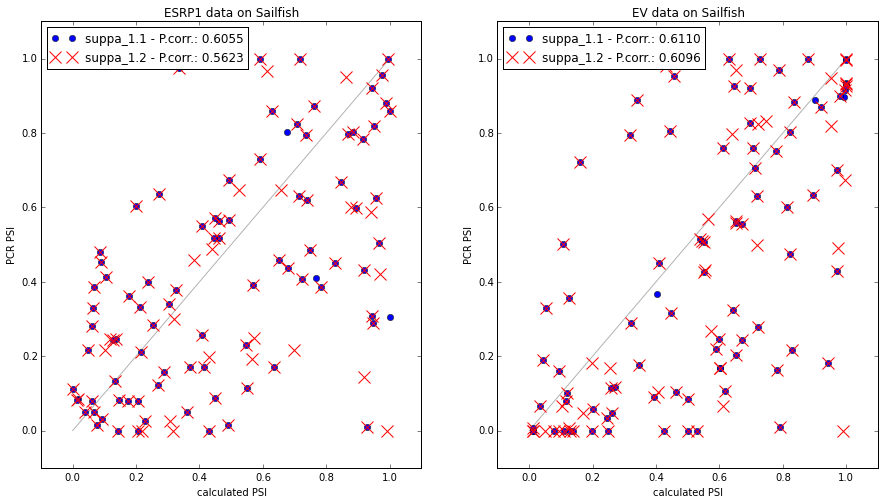

In [5]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

print('ESRP1 SAMPLE:')
print('SUPA v1.1: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/ensembl_sailfish_suppa1_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA v1.2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/ensembl_sailfish_suppa2_esrp1.txt.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.1: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/ensembl_sailfish_suppa1_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA v1.2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/ensembl_sailfish_suppa2_ev.txt.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.1', sam2_lab='suppa_1.2')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.1', sam2_lab='suppa_1.2')




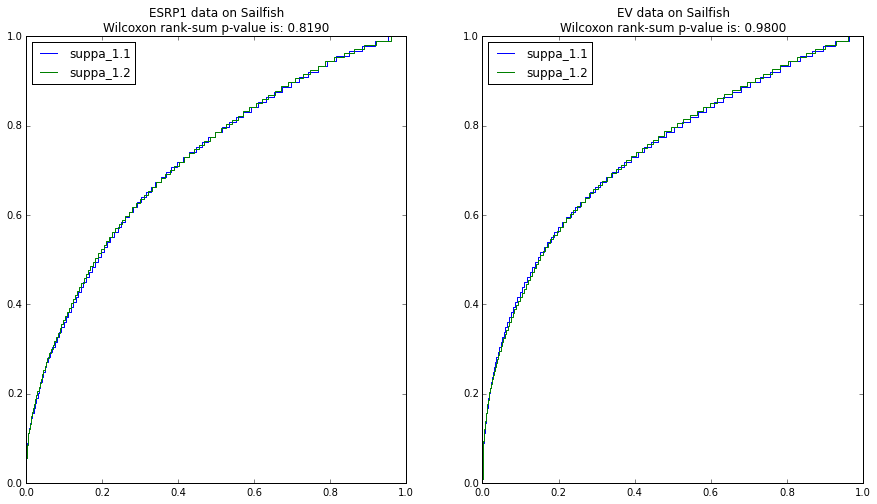


Graph1, sample1:
	Average Error is: 0.2171
	Area under curve is: 0.7238
Graph1, sample2:
	Average Error is: 0.2268
	Area under curve is: 0.7258
Graph2, sample1:
	Average Error is: 0.2330
	Area under curve is: 0.7421
Graph2, sample2:
	Average Error is: 0.2335
	Area under curve is: 0.7426


In [6]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'suppa_1.1', 'suppa_1.2', mtitle='ESRP1 data on Sailfish')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'suppa_1.1', 'suppa_1.2', mtitle='EV data on Sailfish')
pyplot.show()
print()


ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

<h2>Effect of total-filter (-f) on correlation</h2>

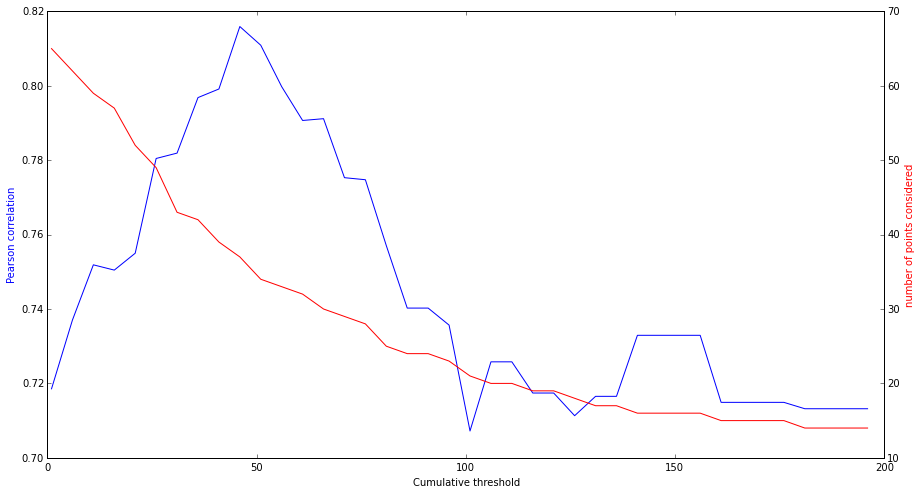

Suppa 1.2 Event results based on different Cumulative treshold. Calculated from refseq annotation.


In [7]:
savepath = '../psi/SE_fparam_esrp1/'
points = []
for my_file in os.listdir(savepath):
    if my_file.endswith('.gtf'):
        continue
    suppa1_events = load_se_events(savepath + my_file)
    points1 = make_points_pairs(pcr_esrp1_events, suppa1_events, verbose=False)
    number = (int(my_file[28:-4]))
    cor = pearsonr(*zip(*points1))[0]
    points.append((number, cor, len(points1)))

x, y, z = zip(*sorted(points))
fig, ax1 = pyplot.subplots()
ax1.plot(x, y, 'b-')
ax1.set_xlabel('Cumulative threshold')
ax1.set_ylabel('Pearson correlation', color='b')

ax2 = ax1.twinx()
ax2.plot(x, z, 'r')
ax2.set_ylabel('number of points considered', color='r')
pyplot.show()
print('Suppa 1.2 Event results based on different Cumulative treshold. Calculated from refseq annotation.')

# SUPPA v1.2 vs SUPPAx Tests

Here different (new) implementations are tested.

## SE PCR

Here SE event is considered to be pressent regarldess of neighbour boudries.

Representation:
<img src="files/PCR.jpg">

ESRP1 SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)
SUPA SEpcr: PSI from sailfish numbers:
	Points covered: 70 (42.6829 %; removed 1 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)
SUPA SEpcr: PSI from sailfish numbers:
	Points covered: 70 (42.6829 %; removed 1 point(s) duo to "duplicated" event)


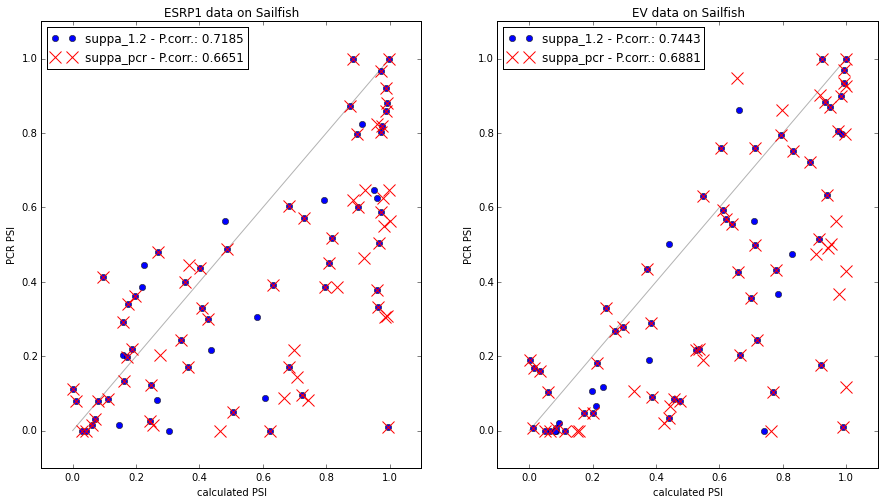

In [8]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()

print('ESRP1 SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA SEpcr: PSI from sailfish numbers:')
suppa2_events = load_sepcr_events('../psi/refseq_sailfish_SEpcr_esrp1.txt.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA SEpcr: PSI from sailfish numbers:')
suppa2_events = load_sepcr_events('../psi/refseq_sailfish_SEpcr_ev.txt.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr')

1 point in SEpcr is removed because of same gene is under two IDs.<br>


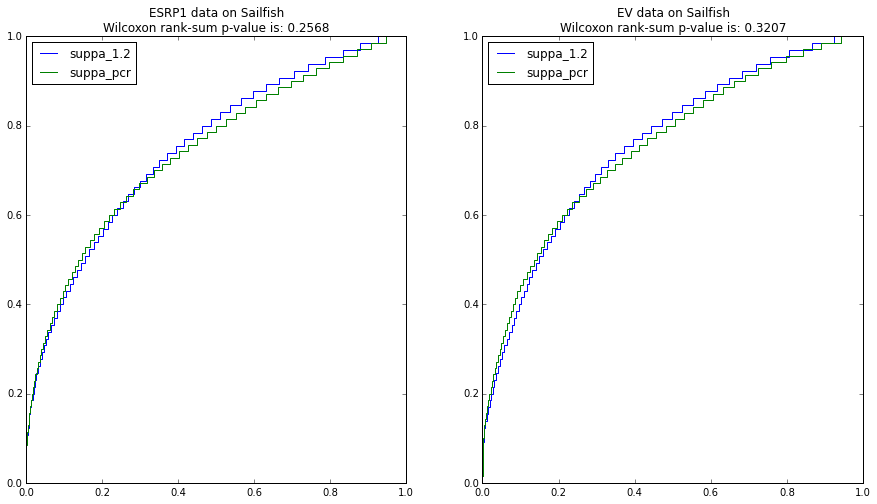

RefSeq SE - PCR results

Graph1, sample1:
	Average Error is: 0.2059
	Area under curve is: 0.7530
Graph1, sample2:
	Average Error is: 0.2571
	Area under curve is: 0.7456
Graph2, sample1:
	Average Error is: 0.1962
	Area under curve is: 0.7589
Graph2, sample2:
	Average Error is: 0.2394
	Area under curve is: 0.7537


In [9]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'suppa_1.2', 'suppa_pcr', mtitle='ESRP1 data on Sailfish')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'suppa_1.2', 'suppa_pcr', mtitle='EV data on Sailfish')
pyplot.show()
print('RefSeq SE - PCR results')

print()

ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

<h4>New exons:</h4>

In [10]:
# Print out new events
new_ids = set(suppa2_events.keys()) - set(suppa1_events.keys())
pcr_events = set(pcr_esrp1_events.keys())
print('Newly recovered IDs are:')
for chro, beg, en in (new_ids & pcr_events):
    print('\t{}:{}-{}'.format(chro, beg, en))

Newly recovered IDs are:
	chr3:50389440-50389477
	chr5:134688636-134688735
	chr9:33463031-33463132
	chr1:153615703-153615840


<br>
Theese events are (complex) skip exons or alternative exon usages.
Example:
<img src="files/PCR_exons.jpg">
Figure: Gene transcripts (top) and Found SEs (Bottom)

Probably this is not the way we want to define PCR events.

<h2>SE PCR2</h2>

PCR v2 boundires are dynamic - addittional transcripts are added if they are within a given threshold.

Representation:
<img src="files/PCR2.jpg">

ESRP1 SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)
SUPA pcr2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)
SUPA pcr2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)


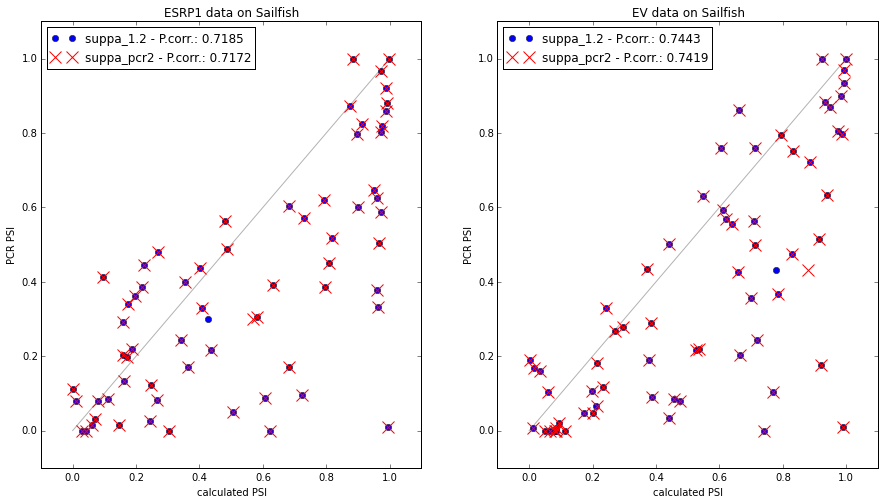

Threshold is set to 10.


In [11]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

print('ESRP1 SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA pcr2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/refseq_sailfish_SEpcr2_esrp1_th10.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA pcr2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/refseq_sailfish_SEpcr2_ev_th10.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr2')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr2')
pyplot.show()
print('Threshold is set to 10.')

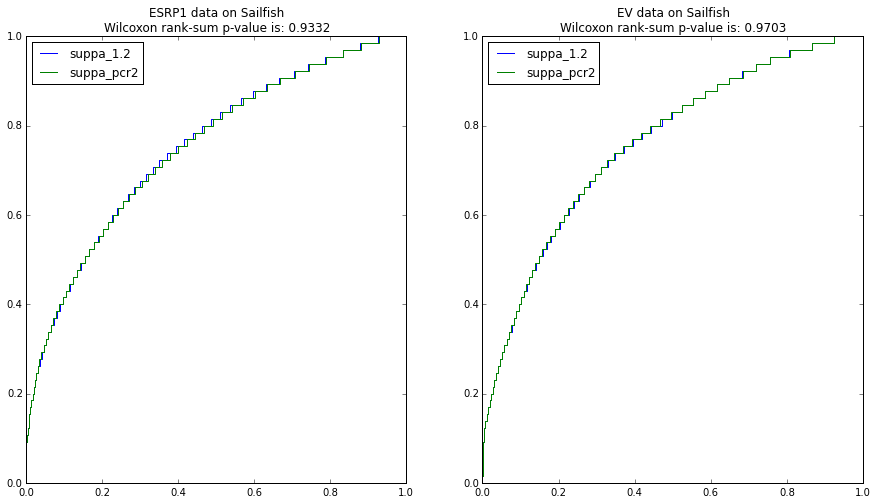

RefSeq SE - PCR2 results

Graph1, sample1:
	Average Error is: 0.2059
	Area under curve is: 0.7530
Graph1, sample2:
	Average Error is: 0.2080
	Area under curve is: 0.7515
Graph2, sample1:
	Average Error is: 0.1962
	Area under curve is: 0.7589
Graph2, sample2:
	Average Error is: 0.1978
	Area under curve is: 0.7597


In [12]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'suppa_1.2', 'suppa_pcr2', mtitle='ESRP1 data on Sailfish')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'suppa_1.2', 'suppa_pcr2', mtitle='EV data on Sailfish')
pyplot.show()
print('RefSeq SE - PCR2 results')

print()

ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

<h2>Does chaning threshold affect correlation?</h2>

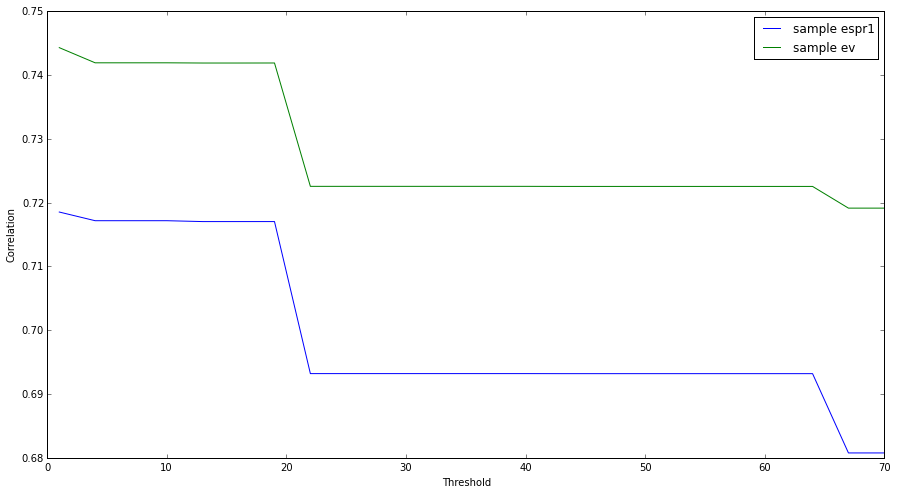

Figure: Effect of threshold on correlation with PCR (Refseq/Sailfish)


In [13]:
pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()
savepath = '../psi/PCR2_series/'
savepath2 = '../psi/PCR2_series_ev/'
points = []
points_ev = []

# load esrp1
for my_file in os.listdir(savepath):
    if my_file.endswith('.gtf'):
        continue
    suppa1_events = load_se_events(savepath + my_file)
    points1 = make_points_pairs(pcr_esrp1_events, suppa1_events, verbose=False)
    number = (int(my_file[31:-4]))
    cor = pearsonr(*zip(*points1))[0]
    points.append((number, cor))

# Load EV
for my_file in os.listdir(savepath2):
    if my_file.endswith('.gtf'):
        continue
    suppa1_events = load_se_events(savepath2 + my_file)
    points1 = make_points_pairs(pcr_ev_events, suppa1_events, verbose=False)
    number = (int(my_file[28:-4]))
    cor = pearsonr(*zip(*points1))[0]
    points_ev.append((number, cor))


x, y = zip(*sorted(points))
_, z = zip(*sorted(points_ev))
_ = pyplot.plot(x, y, label='sample espr1')
_ = pyplot.plot(x, z, label='sample ev')
_ = pyplot.xlabel('Threshold')
_ = pyplot.ylabel('Correlation')
_ = pyplot.legend()
pyplot.show()
print('Figure: Effect of threshold on correlation with PCR (Refseq/Sailfish)')

# PCR and PCR2 on ENSEMBL

<h4>PCR test</h4>

ESRP1 SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 107 (65.2439 %; removed 9 point(s) duo to "duplicated" event)
SUPA SEpcr: PSI from sailfish numbers:
	Points covered: 119 (72.5610 %; removed 1 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 108 (65.8537 %; removed 9 point(s) duo to "duplicated" event)
SUPA SEpcr: PSI from sailfish numbers:
	Points covered: 122 (74.3902 %; removed 1 point(s) duo to "duplicated" event)


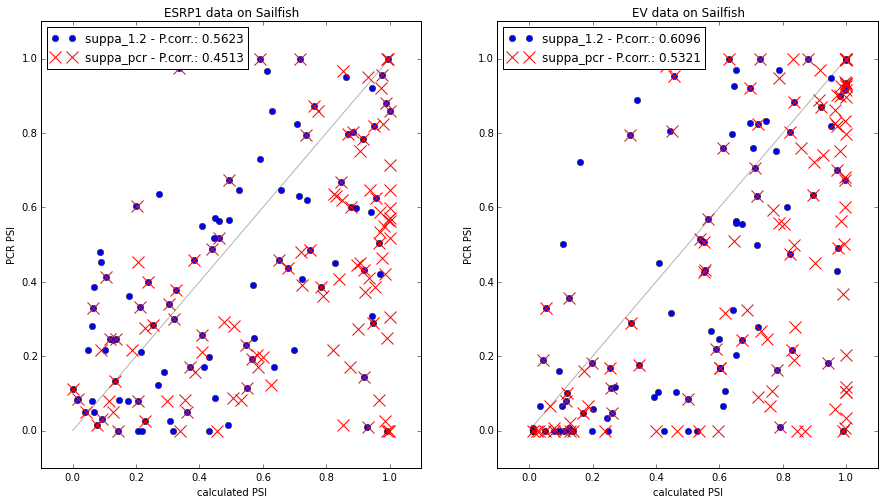

Threshold is set to 10.


In [14]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()

print('ESRP1 SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/ensembl_sailfish_suppa2_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA SEpcr: PSI from sailfish numbers:')
suppa2_events = load_sepcr_events('../psi/ensembl_tests/sailfish_SEpcr_esrp1.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/ensembl_sailfish_suppa2_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA SEpcr: PSI from sailfish numbers:')
suppa2_events = load_sepcr_events('../psi/ensembl_tests/sailfish_SEpcr_ev.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr')
pyplot.show()
print('Threshold is set to 10.')

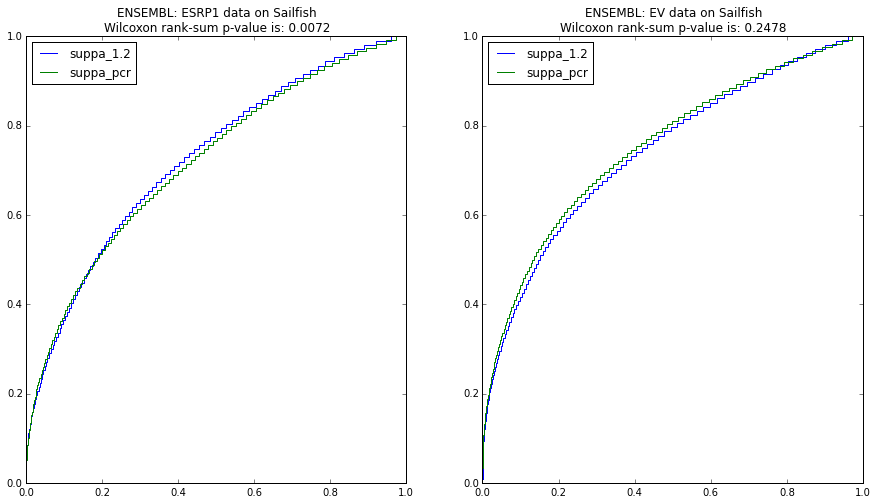

RefSeq SE - PCR2 results

Graph1, sample1:
	Average Error is: 0.2268
	Area under curve is: 0.7258
Graph1, sample2:
	Average Error is: 0.3146
	Area under curve is: 0.7181
Graph2, sample1:
	Average Error is: 0.2335
	Area under curve is: 0.7426
Graph2, sample2:
	Average Error is: 0.2918
	Area under curve is: 0.7541


In [15]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'suppa_1.2', 'suppa_pcr', mtitle='ENSEMBL: ESRP1 data on Sailfish')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'suppa_1.2', 'suppa_pcr', mtitle='ENSEMBL: EV data on Sailfish')
pyplot.show()
print('RefSeq SE - PCR2 results')

print()

ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

<h4>PCR2 test</h4>

ESRP1 SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 107 (65.2439 %; removed 9 point(s) duo to "duplicated" event)
SUPA pcr2: PSI from sailfish numbers:
	Points covered: 107 (65.2439 %; removed 9 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 108 (65.8537 %; removed 9 point(s) duo to "duplicated" event)
SUPA pcr2: PSI from sailfish numbers:
	Points covered: 108 (65.8537 %; removed 9 point(s) duo to "duplicated" event)


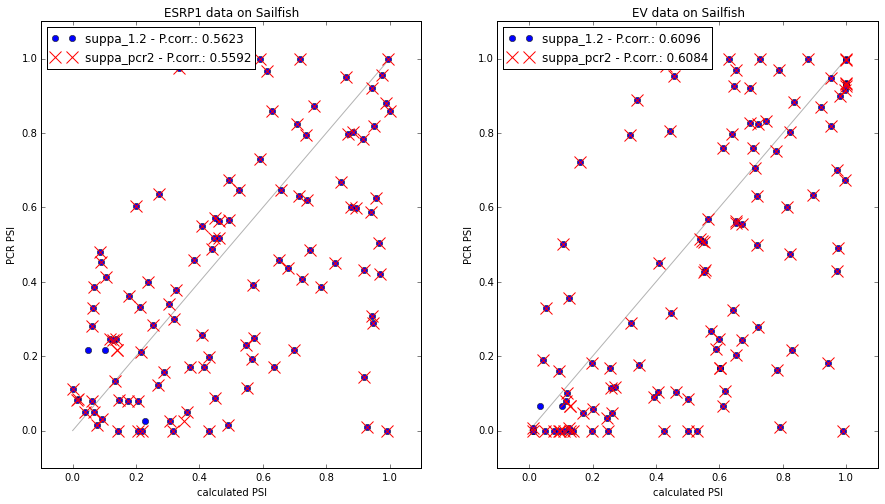

Threshold is set to 10.


In [16]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

print('ESRP1 SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/ensembl_sailfish_suppa2_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA pcr2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/ensembl_tests/sailfish_SEpcr2_esrp1.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/ensembl_sailfish_suppa2_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA pcr2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/ensembl_tests/sailfish_SEpcr2_ev.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr2')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr2')
pyplot.show()
print('Threshold is set to 10.')

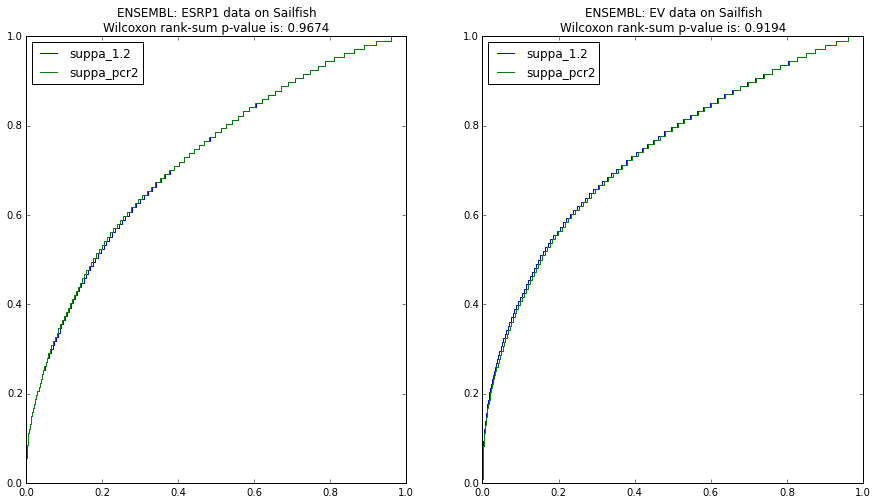

RefSeq SE - PCR2 results

Graph1, sample1:
	Average Error is: 0.2268
	Area under curve is: 0.7258
Graph1, sample2:
	Average Error is: 0.2268
	Area under curve is: 0.7275
Graph2, sample1:
	Average Error is: 0.2335
	Area under curve is: 0.7426
Graph2, sample2:
	Average Error is: 0.2349
	Area under curve is: 0.7395


In [17]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'suppa_1.2', 'suppa_pcr2', mtitle='ENSEMBL: ESRP1 data on Sailfish')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'suppa_1.2', 'suppa_pcr2', mtitle='ENSEMBL: EV data on Sailfish')
pyplot.show()
print('RefSeq SE - PCR2 results')

print()

ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

# PCR3 events

PCR3 events are defined as the picture shows
<img src="files/PCR3.jpg">

ESRP1 SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)
SUPA pcr3: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)
SUPA pcr3: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)


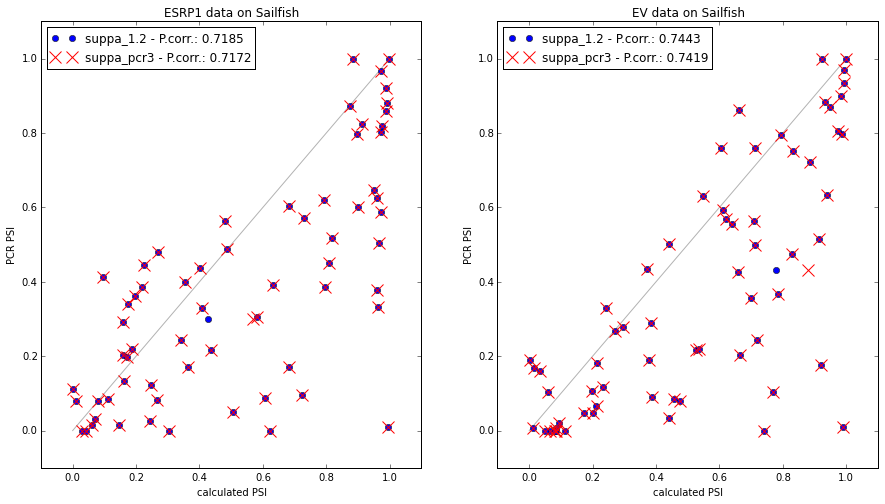

Threshold is set to 10.


In [18]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

print('ESRP1 SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA pcr3: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/refseq_sailfish_SEpcr3_esrp1_th10.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA pcr3: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/refseq_sailfish_SEpcr3_ev_th10.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr3')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr3')

pyplot.show()
print('Threshold is set to 10.')

ESRP1 SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 107 (65.2439 %; removed 9 point(s) duo to "duplicated" event)
SUPA pcr3: PSI from sailfish numbers:
	Points covered: 107 (65.2439 %; removed 9 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 108 (65.8537 %; removed 9 point(s) duo to "duplicated" event)
SUPA pcr3: PSI from sailfish numbers:
	Points covered: 108 (65.8537 %; removed 9 point(s) duo to "duplicated" event)


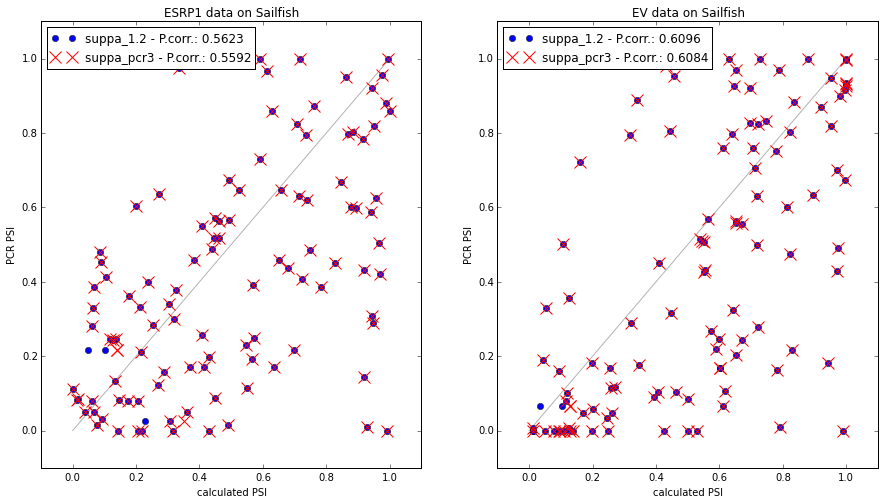

Threshold is set to 10.


In [19]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

print('ESRP1 SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/ensembl_sailfish_suppa2_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA pcr3: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/ensembl_tests/sailfish_SEpcr3_esrp1.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/ensembl_sailfish_suppa2_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA pcr3: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/ensembl_tests/sailfish_SEpcr3_ev.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr3')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr3')

pyplot.show()
print('Threshold is set to 10.')

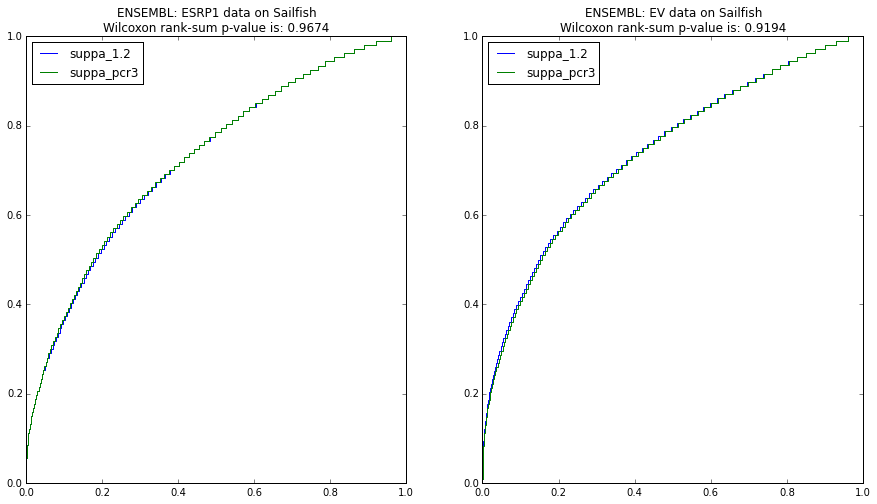

Ensembl SE - PCR2 results

Graph1, sample1:
	Average Error is: 0.2268
	Area under curve is: 0.7258
Graph1, sample2:
	Average Error is: 0.2268
	Area under curve is: 0.7275
Graph2, sample1:
	Average Error is: 0.2335
	Area under curve is: 0.7426
Graph2, sample2:
	Average Error is: 0.2349
	Area under curve is: 0.7395


In [20]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'suppa_1.2', 'suppa_pcr3', mtitle='ENSEMBL: ESRP1 data on Sailfish')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'suppa_1.2', 'suppa_pcr3', mtitle='ENSEMBL: EV data on Sailfish')
pyplot.show()
print('Ensembl SE - PCR2 results')

print()

ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

<h1> RI events</h1>

New RI_pcr events  have been implemented. Following figure shows how the events are considered.
<img src="files/RI_implementations1.jpg">
Figure: RIpcr and RIpcr2 novelties



<h1>SS events</h1> 

New SS_pcr events have been implemented. Following figure shows how the events are considered.
<img src="files/SS_implementation.jpg">
Figure: SSpcr and SSpcr2 novelties

Note: 
- Getting loose of neighbour boudry introduces many new SS events.
- with "PCR" implementation RI events become a subgroup of SS events


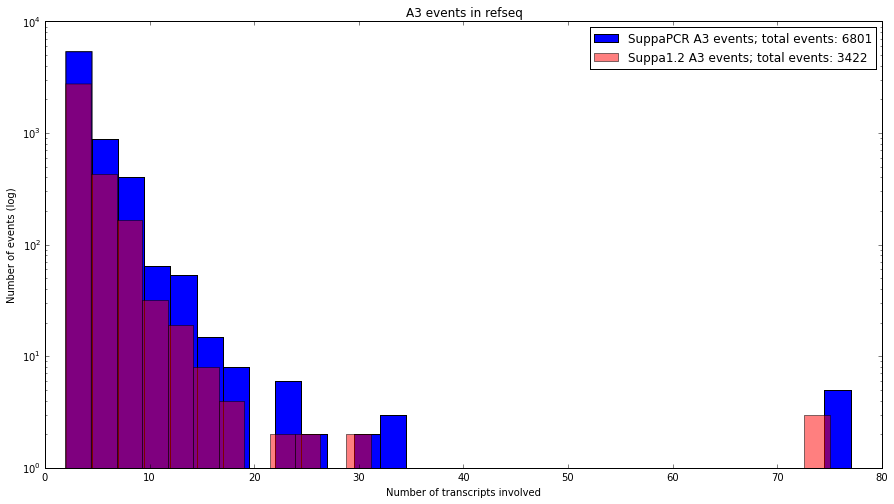

In [21]:
def import_events(file_path):
    """
    Imports ioe file and returs array with 
    number of transcripts involved in each events.
    """
    els_n = []
    with open(file_path, 'r') as handle:
        next(handle)
        for i in handle:
            els_n.append(len(i.strip().split('\t')[-1].split(',')))
    return els_n

v_12 = import_events('../ioe_SS/refseq_A3.ioe')
v_pcr = import_events('../ioe_SS/refseq_A3pcr.ioe')

pyplot.hist(v_pcr, bins=30, color='b', log=True, label='SuppaPCR A3 events; total events: {}'.format(len(v_pcr)))
pyplot.hist(v_12, bins=30, color='r', alpha=0.5, log=True, label='Suppa1.2 A3 events; total events: {}'.format(len(v_12)))
pyplot.title("A3 events in refseq")
pyplot.xlabel("Number of transcripts involved")
pyplot.ylabel("Number of events (log)")
pyplot.legend()
pyplot.show()

Suppa PCR  generates a lot more events

<h1>Kallisto TPM - REFSEQ</h1>

Here REFSEQ results  of Kalisto "alignment" are compared to Sailfish (default). 

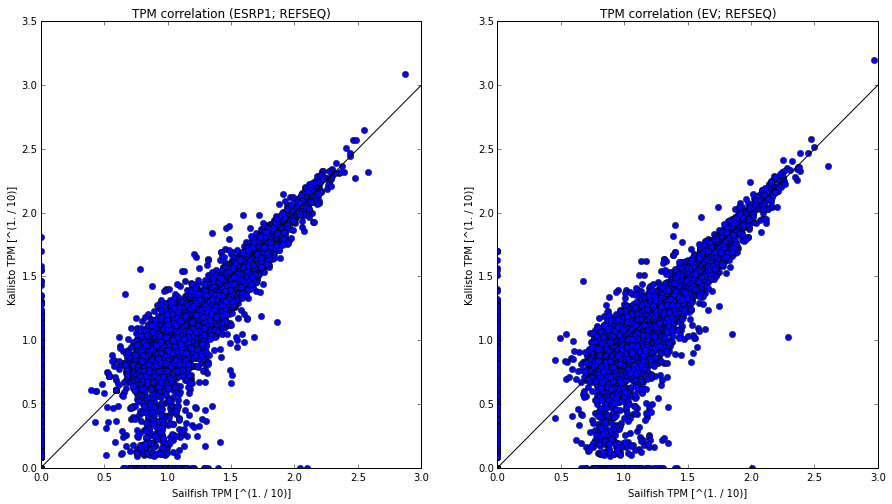

Pearson correlation of ESRP1: 0.8903
Pearson correlation of EV: 0.8947


In [22]:
def load_tpm(tpm_file):
    """
    Loads TMP values into dictionary
    """
    el_dict = {}
    with open(tpm_file) as handle:
        next(handle)
        for line in handle:
            line = line.strip().split()
            el_dict[line[0]] = float(line[1]) ** (1./10)
    return el_dict
                                     
def plot_graphs(axes, xpoints, ypoints, title):
    axes.plot(xpoints, ypoints, 'o');
    # axes.set_xlim(0, 1000)
    # axes.set_ylim(0, 1000)
    axes.set_xlabel('Sailfish TPM [^(1. / 10)]')
    axes.set_ylabel('Kallisto TPM [^(1. / 10)]')
    axes.set_title(title)
    axes.plot([0, 3], [0, 3], 'black')

sailfish_esrp1_refseq_tpm = load_tpm('../dat/pcr/esrp1/refseq_tpm_sailfish-corrected.tab')
kalisto_esrp1_refseq_tpm = load_tpm('../kallisto_TPM/kallisto_refseq_esrp1_tpm.txt')

sailfish_ev_refseq_tpm = load_tpm('../dat/pcr/ev/refseq_tpm_sailfish-corrected.tab')
kalisto_ev_refseq_tpm = load_tpm('../kallisto_TPM/kallisto_refseq_ev_tpm.txt')

sf_point = []
ka_point = []
sf_point2 = []
ka_point2 = []

for id in sailfish_esrp1_refseq_tpm:
    sf_point.append(sailfish_esrp1_refseq_tpm[id])
    ka_point.append(kalisto_esrp1_refseq_tpm[id])
    sf_point2.append(sailfish_ev_refseq_tpm[id])
    ka_point2.append(kalisto_ev_refseq_tpm[id])

my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_graphs(axes, sf_point, ka_point, 'TPM correlation (ESRP1; REFSEQ)')
plot_graphs(axes2, sf_point2, ka_point2,  'TPM correlation (EV; REFSEQ)')
pyplot.show()


print('Pearson correlation of ESRP1: {:.4f}'.format(pearsonr(sf_point, ka_point)[0]))
print('Pearson correlation of EV: {:.4f}'.format(pearsonr(sf_point2, ka_point2)[0]))

<h4>Kallisto to PCR comparrison</h4>

ESRP1 SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from Kallisto numbers:
	Points covered: 64 (39.0244 %; removed 2 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from Kallisto numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)


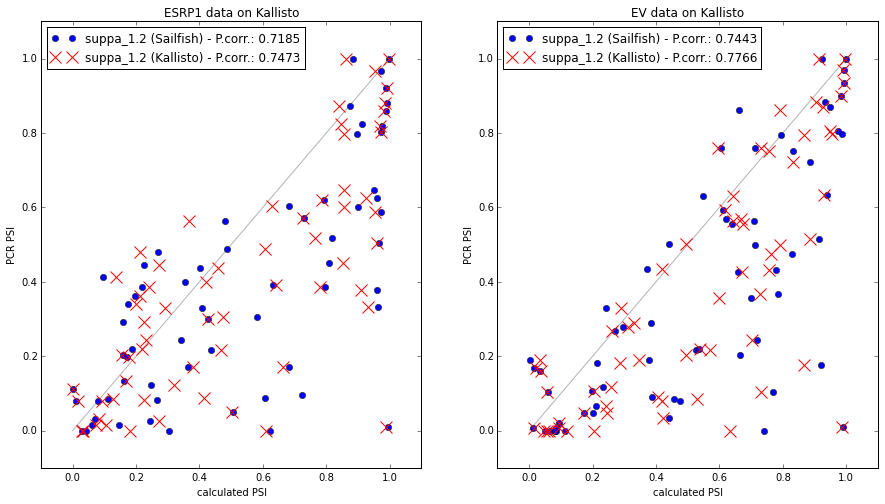

In [23]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()

print('ESRP1 SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA v1.2: PSI from Kallisto numbers:')
suppa2_events = load_se_events('../psi/refseq_kallisto_suppa2_esrp1.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA v1.2: PSI from Kallisto numbers:')
suppa2_events = load_se_events('../psi/refseq_kallisto_suppa2_ev.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Kallisto',
                sam1_lab='suppa_1.2 (Sailfish)', sam2_lab='suppa_1.2 (Kallisto)')
plot_corelation(axes2, points3, points4, title='EV data on Kallisto',
                sam1_lab='suppa_1.2 (Sailfish)', sam2_lab='suppa_1.2 (Kallisto)')

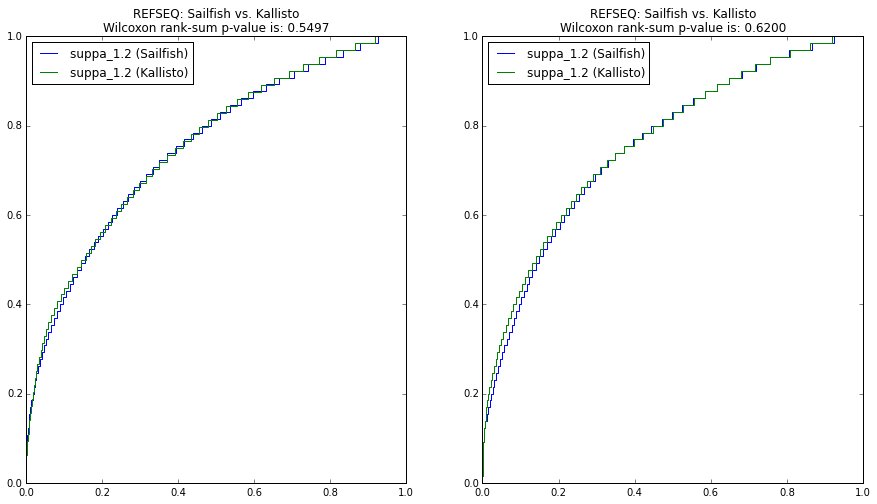

RefSeq SE - PCR2 results

Graph1, sample1:
	Average Error is: 0.2059
	Area under curve is: 0.7530
Graph1, sample2:
	Average Error is: 0.1852
	Area under curve is: 0.7560
Graph2, sample1:
	Average Error is: 0.1962
	Area under curve is: 0.7589
Graph2, sample2:
	Average Error is: 0.1836
	Area under curve is: 0.7645


In [24]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'suppa_1.2 (Sailfish)', 'suppa_1.2 (Kallisto)', mtitle='REFSEQ: Sailfish vs. Kallisto')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'suppa_1.2 (Sailfish)', 'suppa_1.2 (Kallisto)', mtitle='REFSEQ: Sailfish vs. Kallisto')
pyplot.show()
print('RefSeq SE - PCR2 results')

print()

ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

<h1>SALMON TPM - REFSEQ</h1>

Here REFSEQ results  of Salmon are compared to Sailfish (default). 

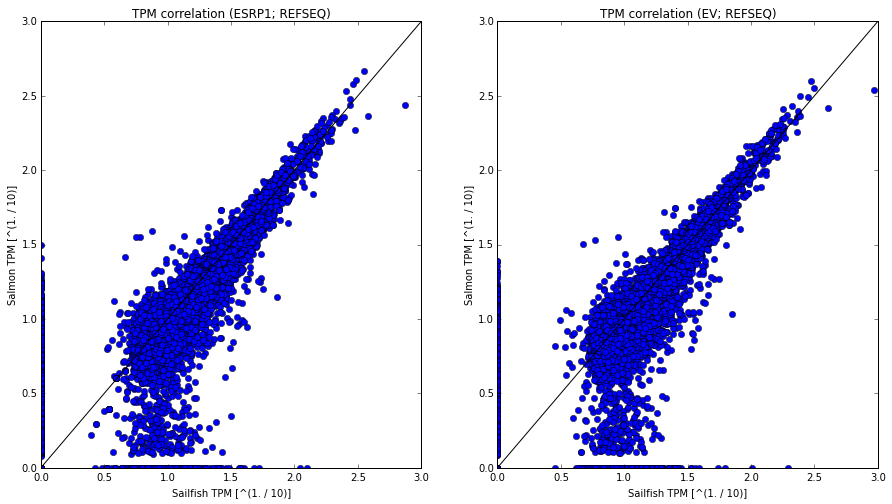

Pearson correlation of ESRP1: 0.8935
Pearson correlation of EV: 0.8946


In [25]:
def load_tpm(tpm_file):
    """
    Loads TMP values into dictionary
    """
    el_dict = {}
    with open(tpm_file) as handle:
        next(handle)
        for line in handle:
            line = line.strip().split()
            el_dict[line[0]] = float(line[1]) **(1./10)
    return el_dict
                                     
def plot_graphs(axes, xpoints, ypoints, title):
    axes.plot(xpoints, ypoints, 'o');
    # axes.set_xlim(0, 1000)
    # axes.set_ylim(0, 1000)
    axes.set_xlabel('Sailfish TPM [^(1. / 10)]')
    axes.set_ylabel('Salmon TPM [^(1. / 10)]')
    axes.set_title(title)
    axes.plot([0, 3], [0, 3], 'black')

sailfish_esrp1_refseq_tpm = load_tpm('../dat/pcr/esrp1/refseq_tpm_sailfish-corrected.tab')
salmon_esrp1_refseq_tpm = load_tpm('../salmon_TPM/refseq_salmon_esrp1.tsv')

sailfish_ev_refseq_tpm = load_tpm('../dat/pcr/ev/refseq_tpm_sailfish-corrected.tab')
salmon_ev_refseq_tpm = load_tpm('../salmon_TPM/refseq_salmon_ev.tsv')

sf_point = []
sa_point = []
sf_point2 = []
sa_point2 = []

for id in sailfish_esrp1_refseq_tpm:
    sf_point.append(sailfish_esrp1_refseq_tpm[id])
    sa_point.append(salmon_esrp1_refseq_tpm[id])
    sf_point2.append(sailfish_ev_refseq_tpm[id])
    sa_point2.append(salmon_ev_refseq_tpm[id])

my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_graphs(axes, sf_point, sa_point, 'TPM correlation (ESRP1; REFSEQ)')
plot_graphs(axes2, sf_point2, sa_point2,  'TPM correlation (EV; REFSEQ)')
pyplot.show()


print('Pearson correlation of ESRP1: {:.4f}'.format(pearsonr(sf_point, sa_point)[0]))
print('Pearson correlation of EV: {:.4f}'.format(pearsonr(sf_point2, sa_point2)[0]))

<h3>Salmon vs Sailfish TPM</h3>

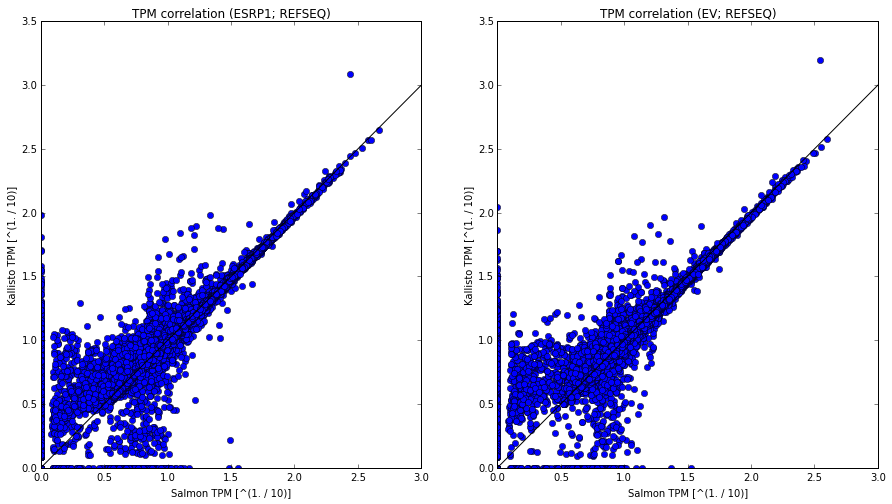

Pearson correlation of ESRP1: 0.9433
Pearson correlation of EV: 0.9374


In [26]:
def load_tpm(tpm_file):
    """
    Loads TMP values into dictionary
    """
    el_dict = {}
    with open(tpm_file) as handle:
        next(handle)
        for line in handle:
            line = line.strip().split()
            el_dict[line[0]] = float(line[1]) ** (1./10)
    return el_dict
                                     
def plot_graphs(axes, xpoints, ypoints, title):
    axes.plot(xpoints, ypoints, 'o');
    # axes.set_xlim(0, 1000)
    # axes.set_ylim(0, 1000)
    axes.set_xlabel('Salmon TPM [^(1. / 10)]')
    axes.set_ylabel('Kallisto TPM [^(1. / 10)]')
    axes.set_title(title)
    axes.plot([0, 3], [0, 3], 'black')
    
salmon_esrp1_refseq_tpm = load_tpm('../salmon_TPM/refseq_salmon_esrp1.tsv')
salmon_ev_refseq_tpm = load_tpm('../salmon_TPM/refseq_salmon_ev.tsv')


kallisto_esrp1_refseq_tpm = load_tpm('../kallisto_TPM/kallisto_refseq_esrp1_tpm.txt')
kallisto_ev_refseq_tpm = load_tpm('../kallisto_TPM/kallisto_refseq_ev_tpm.txt')


sa_point = []
ka_point = []
sa_point2 = []
ka_point2 = []

for id in sailfish_esrp1_refseq_tpm:
    sa_point.append(salmon_esrp1_refseq_tpm[id])
    ka_point.append(kallisto_esrp1_refseq_tpm[id])
    sa_point2.append(salmon_ev_refseq_tpm[id])
    ka_point2.append(kallisto_ev_refseq_tpm[id])

my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_graphs(axes, sa_point, ka_point, 'TPM correlation (ESRP1; REFSEQ)')
plot_graphs(axes2, sa_point2, ka_point2,  'TPM correlation (EV; REFSEQ)')
pyplot.show()


print('Pearson correlation of ESRP1: {:.4f}'.format(pearsonr(sa_point, ka_point)[0]))
print('Pearson correlation of EV: {:.4f}'.format(pearsonr(sa_point2, ka_point2)[0]))

<h3>Salmon to PCR comparisson</h3>

ESRP1 SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from Salmon numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from Salmon numbers:
	Points covered: 65 (39.6341 %; removed 2 point(s) duo to "duplicated" event)


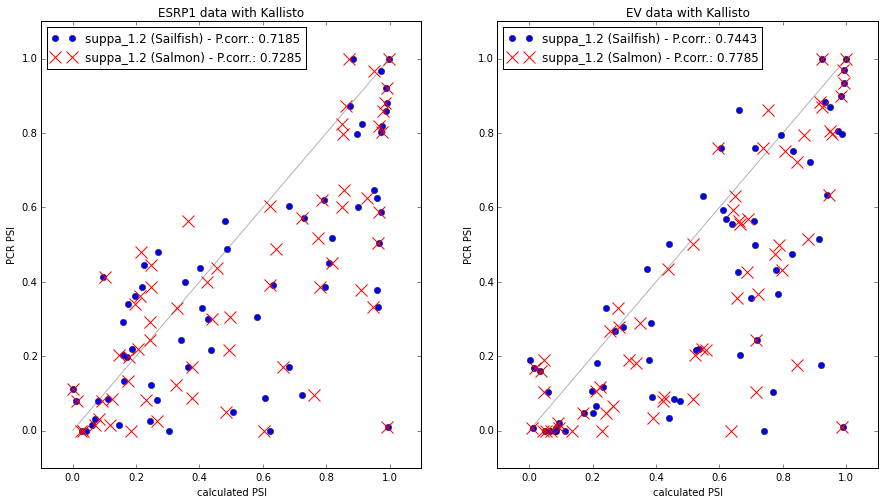

In [27]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()

print('ESRP1 SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA v1.2: PSI from Salmon numbers:')
suppa2_events = load_se_events('../psi/refseq_salmon_suppa2_esrp1.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA v1.2: PSI from Salmon numbers:')
suppa2_events = load_se_events('../psi/refseq_salmon_suppa2_ev.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data with Kallisto',
                sam1_lab='suppa_1.2 (Sailfish)', sam2_lab='suppa_1.2 (Salmon)')
plot_corelation(axes2, points3, points4, title='EV data with Kallisto',
                sam1_lab='suppa_1.2 (Sailfish)', sam2_lab='suppa_1.2 (Salmon)')

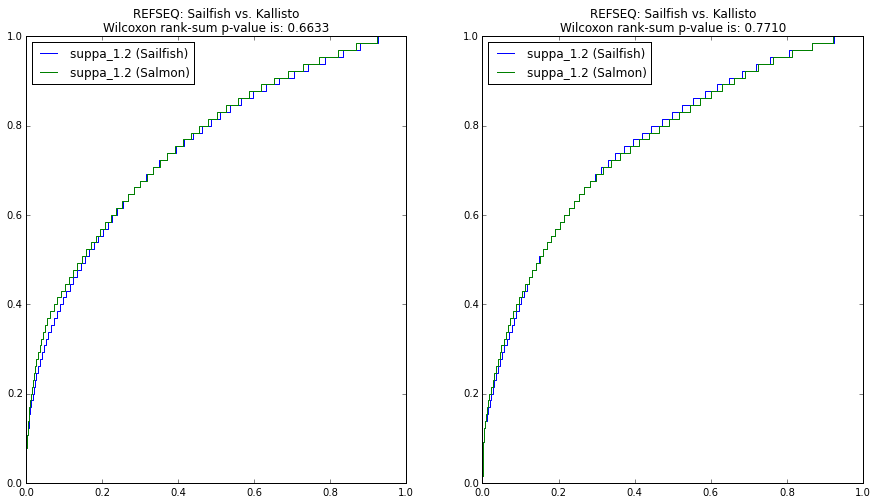

RefSeq SE - PCR2 results

Graph1, sample1:
	Average Error is: 0.2059
	Area under curve is: 0.7530
Graph1, sample2:
	Average Error is: 0.1926
	Area under curve is: 0.7597
Graph2, sample1:
	Average Error is: 0.1962
	Area under curve is: 0.7589
Graph2, sample2:
	Average Error is: 0.1885
	Area under curve is: 0.7569


In [28]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'suppa_1.2 (Sailfish)', 'suppa_1.2 (Salmon)', mtitle='REFSEQ: Sailfish vs. Kallisto')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'suppa_1.2 (Sailfish)', 'suppa_1.2 (Salmon)', mtitle='REFSEQ: Sailfish vs. Kallisto')
pyplot.show()
print('RefSeq SE - PCR2 results')
print()

ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

<h1>TODO</h1>

- Evaluate PCR implementations (SS, SE; how? the 4 AT samples aren't that 'informative')
- ? Add option of compare to all transcripts (last slide of dunde)